# Proceso de decisiones de Markov
**Nombre:** David Egas 
**Asignatura:** Inteligencia Artificial


## Definicion:
El proceso de decisiones de Markov es un formalismo matemático para la toma de decisiones, es una extensión de las cadenas de Markov. Un modelo de decisión de Markov contempla el resultado estocástico de las acciones, describiéndolo mediante funciones probabilísticas de transición de estados. El resultado de la planificación en un MDP no es una secuencia de acciones a ejecutar como sucede en la planificación clásica (Fikes & Nilsson 1971), sino una política que determina la acción a seleccionar en función del estado actual que va tomando el sistema a lo largo de la ejecución de la tarea. Estos modelos no dependen de acciones pasadas.




## Función del agente de acción en los modelos de Markov
En general, en los problemas de decisión las acciones adoptadas por el agente determinan no sólo la recompensa inmediata sino el siguiente estado del entorno, al menos probabilísticamente. Por lo tanto, el agente toma en cuenta el siguiente estado y la recompensa cuando decide tomar una acción determinada. En estos casos, el modelo óptimo considerado para toda la ejecución determinará cómo tomar en cuenta los valores obtenidos en el futuro. El agente debe ser capaz de aprender a partir de recompensas 201 demoradas: o sea, puede obtener una secuencia de pequeñas recompensas inmediatas primero, para finalmente llegar a un estado donde se obtiene un valor de recompensa alto. Es decir, el agente debe aprender cuál de las acciones es deseable tomando en cuenta la o las recompensas que pueden obtenerse en un futuro arbitrariamente lejano.


## Propiedad del modelo de Markov
La propiedad de Markov nos muestra que el futuro es independiente del pasado, dado el presente, lo cual se expresa en la siguiente formula:
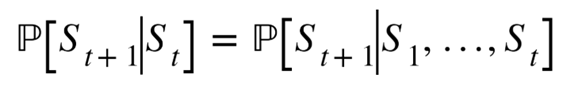

La cual significa que el estado actual (representado por Sₜ) contiene toda la información relevante de los estados pasados (S₁,….. Sₜ), por lo tanto ya no nos serviría tener mayor información de los estados pasados.

## Simplificando lo anterior:
Un proceso de Markov es un proceso sin memoria y aleatorio; en otras palabras es una secuencia de estados aleatorios que posee la propiedad de Markov.
Se podría definir el proceso de Markov como una tupla <S,P>
- S es una lista de estados a los cuales puede pertenecer.
- P es una matriz de transición de estado.


## Aplicación de los modelos de markov 
Los modelos de markov son muy útiles para sistemas en diferentes campos, por nombrar algunos ejemplos tenemos:

- Meteorología: modelos climtológicos basicos 
- Internet: el pagerank de una página web se define a través de una cadena de markov.
- Simulacion:solución analítica a ciertos problemas de simulación.
- Música: diversos algoritmos de composición musical usan cadenas de markov.


# Implementación sencilla 

In [27]:
# Markov Decision Process (MDP) - The Bellman equations adapted to
# Q Learning.Reinforcement Learning with the Q action-value(reward) function.
# Copyright 2018 Denis Rothman MIT License. See LICENSE.
import numpy as ql
# R is The Reward Matrix for each state
R = ql.matrix([ [0,0,0,0,1,0],
		[0,0,0,1,0,1],
		[0,0,100,1,0,0],
		[0,1,1,0,1,0],
		[1,0,0,1,0,0],
		[0,1,0,0,0,0] ])

# Q is the Learning Matrix in which rewards will be learned/stored
Q = ql.matrix(ql.zeros([6,6]))

# Gamma : It's a form of penalty or uncertainty for learning
# If the value is 1 , the rewards would be too high.
# This way the system knows it is learning.
gamma = 0.8

# agent_s_state. The agent the name of the system calculating
# s is the state the agent is going from and s' the state it's going to
# this state can be random or it can be chosen as long as the rest of the choices
# are not determined. Randomness is part of this stochastic process
agent_s_state = 1

# The possible "a" actions when the agent is in a given state
def possible_actions(state):
    current_state_row = R[state,]
    possible_act = ql.where(current_state_row >0)[1]
    return possible_act

# Get available actions in the current state
PossibleAction = possible_actions(agent_s_state)

# This function chooses at random which action to be performed within the range 
# of all the available actions.
def ActionChoice(available_actions_range):
    if(sum(PossibleAction)>0):
        next_action = int(ql.random.choice(PossibleAction,1))
    if(sum(PossibleAction)<=0):
        next_action = int(ql.random.choice(5,1))
    return next_action

# Sample next action to be performed
action = ActionChoice(PossibleAction)

# A version of Bellman's equation for reinforcement learning using the Q function
# This reinforcement algorithm is a memoryless process
# The transition function T from one state to another
# is not in the equation below.  T is done by the random choice above

def reward(current_state, action, gamma):
    Max_State = ql.where(Q[action,] == ql.max(Q[action,]))[1]

    if Max_State.shape[0] > 1:
        Max_State = int(ql.random.choice(Max_State, size = 1))
    else:
        Max_State = int(Max_State)
    MaxValue = Q[action, Max_State]
    
    # Bellman's MDP based Q function
    Q[current_state, action] = R[current_state, action] + gamma * MaxValue

# Rewarding Q matrix
reward(agent_s_state,action,gamma)


# Leraning over n iterations depending on the convergence of the system
# A convergence function can replace the systematic repeating of the process
# by comparing the sum of the Q matrix to that of Q matrix n-1 in the
# previous episode
for i in range(50000):
    current_state = ql.random.randint(0, int(Q.shape[0]))
    PossibleAction = possible_actions(current_state)
    action = ActionChoice(PossibleAction)
    reward(current_state,action,gamma)
    
# Displaying Q before the norm of Q phase
print("Q  :")
print(Q)

# Norm of Q
print("Normed Q :")
print(Q/ql.max(Q)*100)

Q  :
[[  0.      0.      0.      0.    258.44    0.   ]
 [  0.      0.      0.    321.8     0.    207.752]
 [  0.      0.    500.    321.8     0.      0.   ]
 [  0.    258.44  401.      0.    258.44    0.   ]
 [207.752   0.      0.    321.8     0.      0.   ]
 [  0.    258.44    0.      0.      0.      0.   ]]
Normed Q :
[[  0.       0.       0.       0.      51.688    0.    ]
 [  0.       0.       0.      64.36     0.      41.5504]
 [  0.       0.     100.      64.36     0.       0.    ]
 [  0.      51.688   80.2      0.      51.688    0.    ]
 [ 41.5504   0.       0.      64.36     0.       0.    ]
 [  0.      51.688    0.       0.       0.       0.    ]]


# Explicación:
**R:** es la matriz de recompensa.
**Q:** hereda la misma estructura que R, pero todos los valores están configurados 0 ya que esta es una matriz de aprendizaje. Contendrá progresivamente los resultados del proceso de decisión. 
**La variable gamma:** es un recordatorio doble de que el sistema está aprendiendo y que sus decisiones solo tienen un 80% de posibilidades de ser correctas cada vez. 
Como muestra el siguiente código, el sistema explora las posibles acciones durante el proceso.

Una vez que se repite el proceso y hasta que finalice el proceso de aprendizaje, el programa imprimirá el resultado Qy el resultado normalizado. El resultado normalizado es el proceso de dividir todos los valores por la suma de los valores encontrados. El resultado sale como un porcentaje normalizado.



## Conclusión
La propiedad de Markov dice: “No importa qué acciones se hayan llevado a cabo para alcanzar el estado actual, porque el estado actual es suficiente para decidir cuál debe de ser la acción futura”.


## Bibliografía:
- [Ejemplo Implementado:] https://hub.packtpub.com/enhancing-markovs-decision-process-with-bellman-equation-tutorial/

- https://inaoe.repositorioinstitucional.mx/jspui/bitstream/1009/588/1/CuayaSG.pdf?fbclid=IwAR3Ugq184OsLty_D48lv17k2nwR1_JroJmLi0MLOQQHR-Hh32642L6H_rJE

- https://es.coursera.org/lecture/razonamiento-artificial/procesos-de-decision-de-markov-Vqv8j?fbclid=IwAR1K40lkVc9Ad30t500QHGq2NZ3plAs9tiHeVr5fcLn2PNCATicWV2heurg

- https://medium.com/aprendizaje-por-refuerzo-introducci%C3%B3n-al-mundo-del/aprendizaje-por-refuerzo-procesos-de-decisi%C3%B3n-de-markov-parte-1-8a0aed1e6c59